<a href="https://colab.research.google.com/github/JamieXW/PasswordCreator/blob/master/NASA_Space_Apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Pillow
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import imshow
from google.colab.patches import cv2_imshow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#upload files and name as such:
from PIL import Image, ImageFilter
JNCEred = Image.open("/content/JNCEred.png");
JNCEgreen = Image.open("/content/JNCEgreen.png");
JNCEblue = Image.open("/content/JNCEblue.png");
JNCEmap = Image.open("/content/JNCEmap.png");
JNCEraw = Image.open("/content/JNCEraw.png");
#JNCEmap

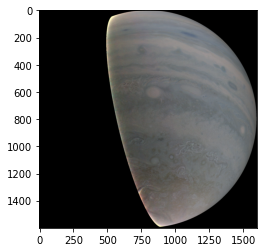

In [ ]:
map = cv2.imread('/content/JNCEmap.png')
plt.imshow(map)

500


(<matplotlib.axes._subplots.AxesSubplot at 0x7f2669568a50>,
 Text(0.5, 1.0, 'Blur User Kernel'))

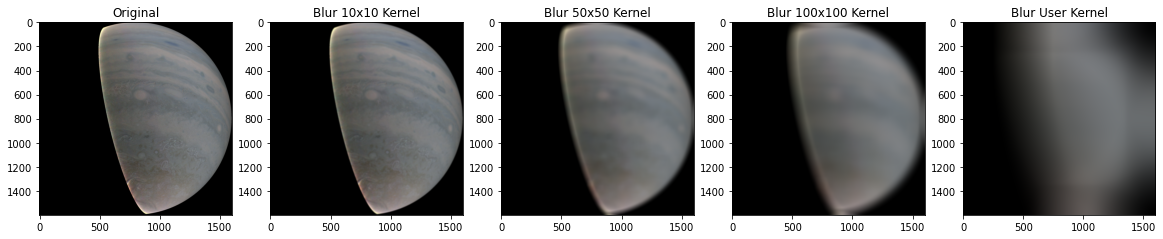

In [ ]:
userBlur = int(input())

k1 = np.ones((10,10),np.float32)/100
k2 = np.ones((50,50),np.float32)/2500
k3 = np.ones((100,100),np.float32)/10000
k4 = np.ones((userBlur,userBlur),np.float32)/(userBlur**2)

map1 = cv2.filter2D(map,-1,k1)
map2 = cv2.filter2D(map,-1,k2)
map3 = cv2.filter2D(map,-1,k3)
map4 = cv2.filter2D(map,-1,k4)

rcParams['figure.figsize'] = 20,8
plt.subplot(1,5,1), plt.imshow(map), plt.title('Original')
plt.subplot(1,5,2), plt.imshow(map1), plt.title('Blur 10x10 Kernel')
plt.subplot(1,5,3), plt.imshow(map2), plt.title('Blur 50x50 Kernel')
plt.subplot(1,5,4), plt.imshow(map3), plt.title('Blur 100x100 Kernel')
plt.subplot(1,5,5), plt.imshow(map4), plt.title('Blur User Kernel')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f2669ac1b50>,
 Text(0.5, 1.0, 'RGB to BGR'))

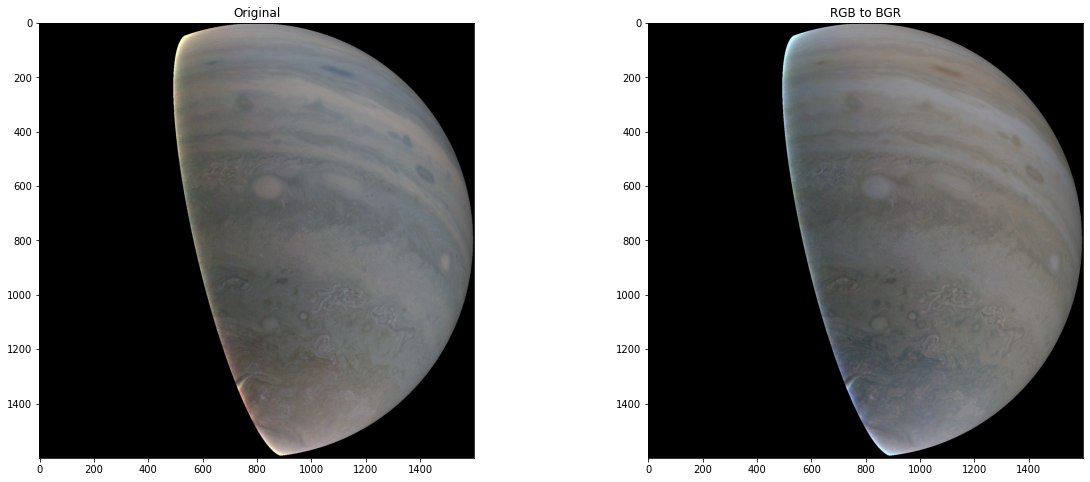

In [ ]:
rcParams['figure.figsize'] = 20,8
plt.subplot(1,2,1), plt.imshow(map), plt.title('Original')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(map, cv2.COLOR_RGB2BGR)), plt.title('RGB to BGR')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f26672e1750>,
 Text(0.5, 1.0, 'Blue'))

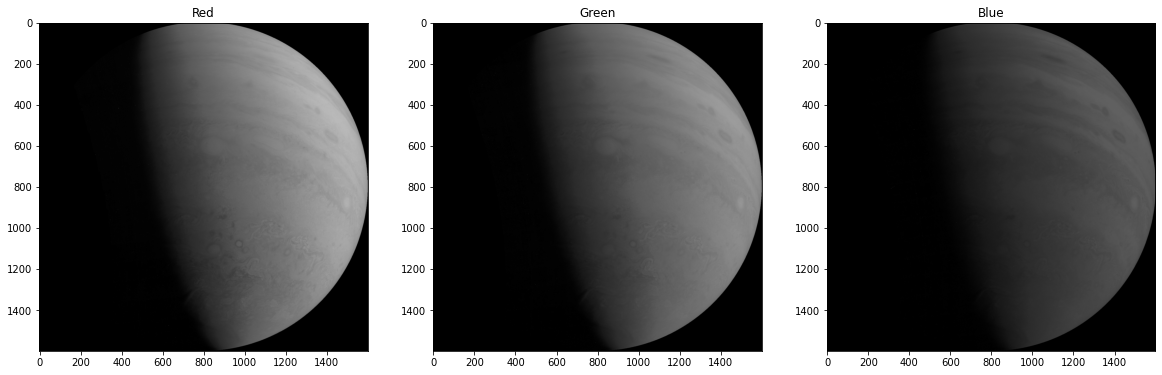

In [ ]:
red = cv2.imread('/content/JNCEred.png')
#r = cv2.split(red)
green = cv2.imread('/content/JNCEgreen.png')
#g = cv2.split(green)
blue = cv2.imread('/content/JNCEblue.png')
#b = cv2.split(blue)

rcParams['figure.figsize'] = 20,8
plt.subplot(1,3,1), plt.imshow(red), plt.title('Red')
plt.subplot(1,3,2), plt.imshow(green), plt.title('Green')
plt.subplot(1,3,3), plt.imshow(blue), plt.title('Blue')

In [ ]:
b, g, r = cv2.split(map)

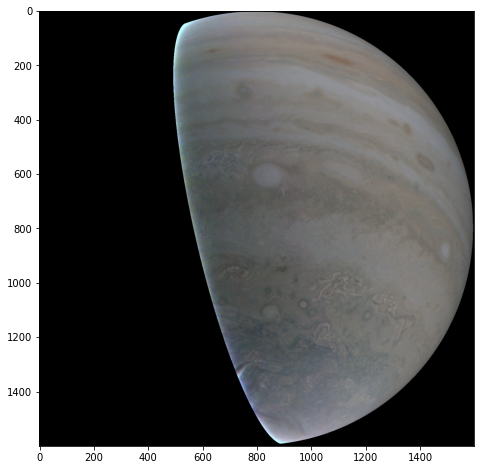

In [ ]:
merged = cv2.merge((r,g,b))
imshow(merged)

2.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7f2667080cd0>,
 Text(0.5, 1.0, 'User Controlled'))

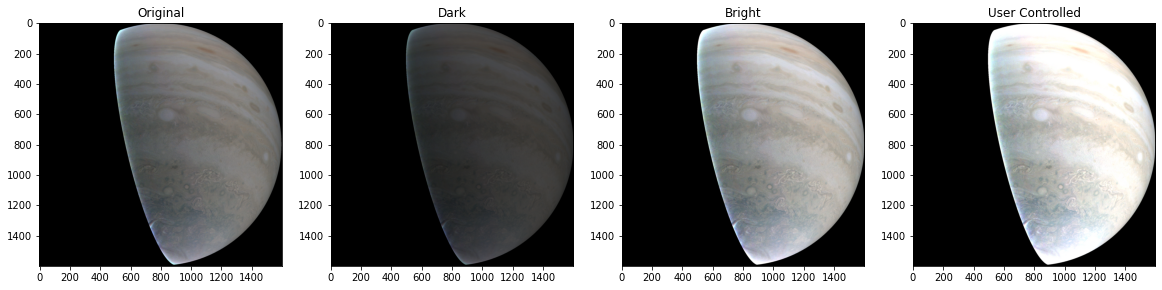

In [ ]:
#ALTERING BRIGHTNESS AND DARKNESS FOR JNCEMAP
from PIL import Image, ImageEnhance

#read the image
im = Image.open("JNCEmap.png")

#image brightness enhancer
enhancer = ImageEnhance.Brightness(im)

factor = 0.5 #darkens the image
im_output = enhancer.enhance(factor)
im_output.save('darkened-image.png')

factor = 1.5 #brightens the image
im_output = enhancer.enhance(factor)
im_output.save('brightened-image.png')

userFactor = float(input())
factor = userFactor #user either brightens or darkens the image
im_output = enhancer.enhance(factor)
im_output.save('userEnhanced-image.png')

JNCEmapBright = Image.open('brightened-image.png');
JNCEmapDark = Image.open('darkened-image.png');
JNCEmapUserEnhanced = Image.open('userEnhanced-image.png');

rcParams['figure.figsize'] = 20,8
plt.subplot(1,4,1), plt.imshow(JNCEmap), plt.title('Original')
plt.subplot(1,4,2), plt.imshow(JNCEmapDark), plt.title('Dark')
plt.subplot(1,4,3), plt.imshow(JNCEmapBright), plt.title('Bright')
plt.subplot(1,4,4), plt.imshow(JNCEmapUserEnhanced), plt.title('User Controlled')

Type 'Red and Blue' or 'Red and Green' or 'Blue and Green': Red and Blue
red: 50
blue: 60


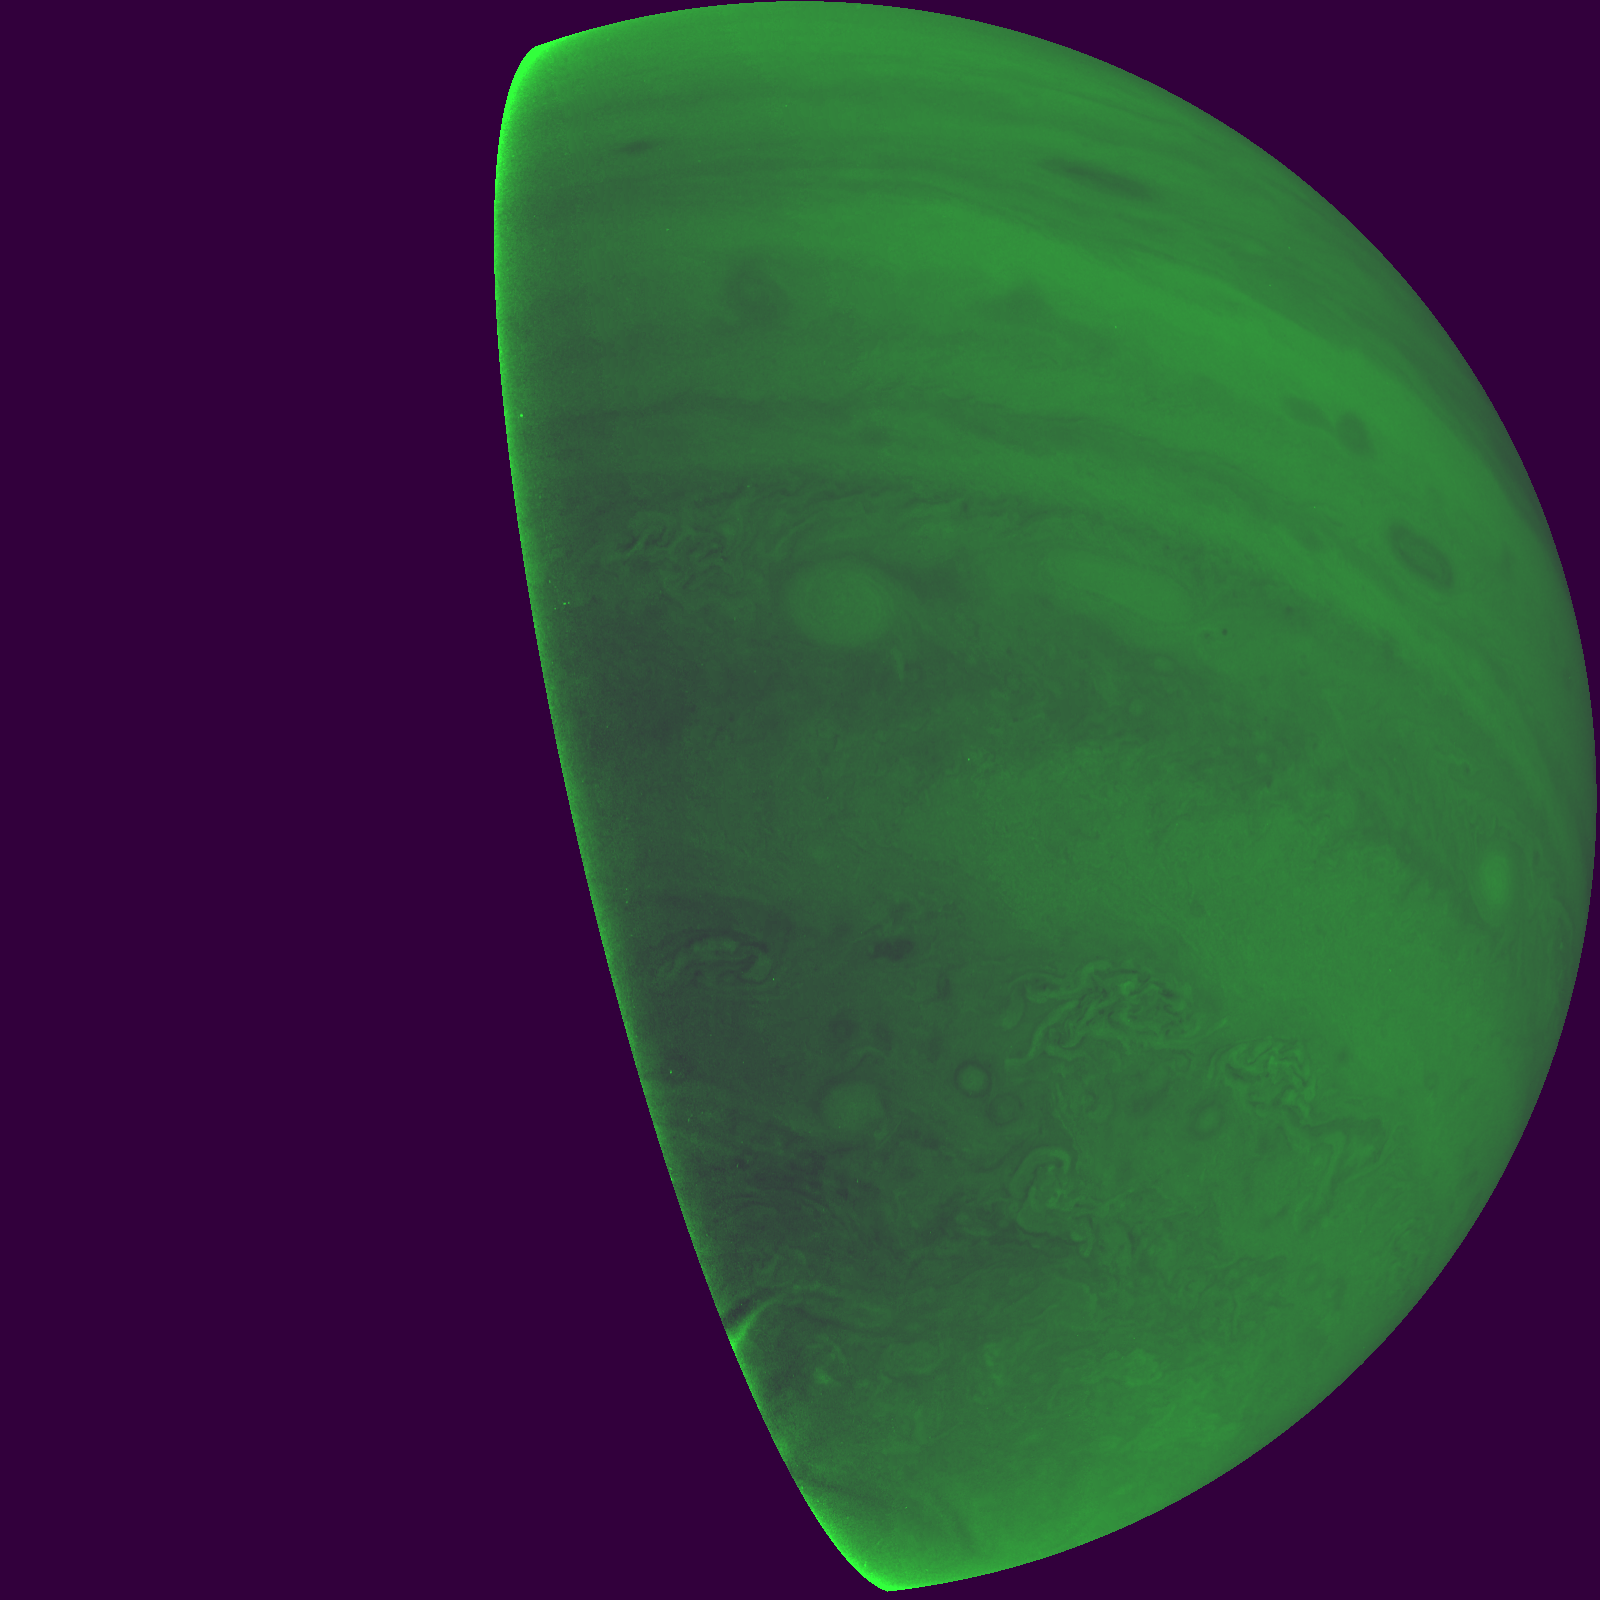

In [ ]:
JNCEcolor = JNCEmap
userAsk = input("Type 'Red and Blue' or 'Red and Green' or 'Blue and Green': ")
if userAsk == 'Red and Blue':
  red = int(input('red: '))
  blue = int(input('blue: '))
  for x in range(0, 1600):
    for y in range(0, 1600):
      r, g, b = JNCEcolor.getpixel((x,y))
      JNCEcolor.putpixel((x,y), (red, g, blue)) #color changer
if userAsk == 'Red and Green':
  red = int(input('red: '))
  green = int(input('green: '))
  for x in range(0, 1600):
    for y in range(0, 1600):
      r, g, b = JNCEcolor.getpixel((x,y))
      JNCEcolor.putpixel((x,y), (red, green, b)) #color changer
if userAsk == 'Blue and Green':
  blue = int(input('blue: '))
  green = int(input('green: '))
  for x in range(0, 1600):
    for y in range(0, 1600):
      r, g, b = JNCEcolor.getpixel((x,y))
      JNCEcolor.putpixel((x,y), (r, green, blue)) #color changer

JNCEcolor